# Plotting multivariate data using Scatterplots and Profile plots

For a simple scatterplot you can use Pandas.  
But if your data has different categories, it's probably better to use a Seaborn scatterplot which makes that easy.  
However if you would like to do some outlier inspection, you need interactivity. This is done here with Plotly.  
For profile plots, just transpose the data and use pandas.

## Import plotting libraries

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objs as go

## Read the housing data

In [2]:
df = pd.read_csv('./data/housing.csv', header=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 4 columns):
region        353 non-null object
authority     353 non-null object
houseprice    353 non-null float64
income        353 non-null float64
dtypes: float64(2), object(2)
memory usage: 11.1+ KB


In [4]:
df.head(3)

,region,authority,houseprice,income
0,East Midlands,Amber Valley,84828.000,28509.000
1,East Midlands,Bolsover,72854.000,23322.000
2,East Midlands,Chesterfield,92295.000,28409.000


## Simple scatterplot with Pandas  
This does not have different colors for every region, so it's not what i want

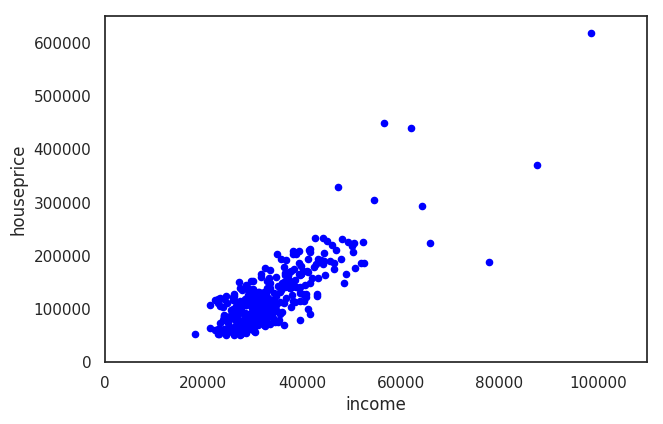

In [5]:
ax = df.plot(x='income', y='houseprice', kind='scatter', c='blue')
ax.set(xlim=(0, 110000), ylim=(0, 650000));

## Creating a static scatter plot with Seaborn (with a separate color for every category)

You can make a scatter plot with pandas but it's less easy to give every category a different color on the scatter plot.  
With seaborn this is much easier.

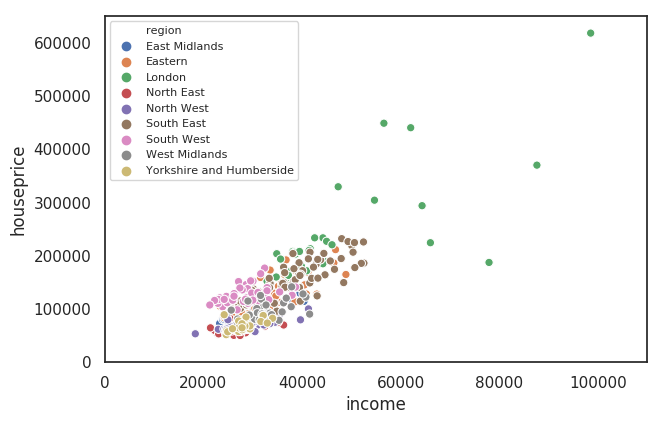

In [6]:
ax = sns.scatterplot(
    data=df, 
    x='income', 
    y='houseprice', 
    hue='region',
)
ax.set(xlim=(0, 110000), ylim=(0, 650000))
ax.legend(fontsize=8);

## Interactive scatter plot with Plotly (with a separate color for every category)

If you would also like to check out outliers and give colors to different categories on the scatter plot,  
then plotly is probably your best choice.  
NB: This solution works with Jupyter lab and the right extensions installed.

In [7]:
fig = go.FigureWidget(
    data=[
        {
            'x': df.loc[df['region'] == region, 'income'], 
            'y': df.loc[df['region'] == region, 'houseprice'], 
            'name': region,
            'text': df[df.region == region]['authority'],
            'hoverinfo': 'x+y+name+text',  # specify what to show on hover
            'mode': 'markers',  # make sure you get scatter points and not lines
            'type': 'scatter',
        } for region in df.region.unique().tolist()
    ],
    layout={
        'title': 'Relationship income and household',
        'xaxis': {'range': [0, 100000], 'title': 'income'},
        'yaxis': {'range': [0, 625000], 'title': 'houseprice'},
        'width': 1000,  # size of plot
        'height': 500,  # size of plot
        'hovermode': 'closest',
    }
)
fig

FigureWidget({
    'data': [{'hoverinfo': 'x+y+name+text',
              'mode': 'markers',
              'nam…

## Matrix scatterplot

Below I'm showing examples from:
* pandas -> fast 
* seaborn -> fast and beautiful
* plotly -> more typing, not so intuitive, but interactive

#### Reading the school data = lea_df

In [8]:
df_lea = pd.read_csv('./data/lea.csv', header=0)
df_lea.head(3)

,lea,english,maths,science
0,City of London,96.600,79.300,93.100
1,Richmond upon Thames,86.900,82.500,94.000
2,Wokingham,84.900,81.200,91.800


### Pandas way for a matrix scatterplot
This requires importing an extra pandas.plotting function: [scatter_matrix()][sm]

[sm]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html#pandas.plotting.scatter_matrix

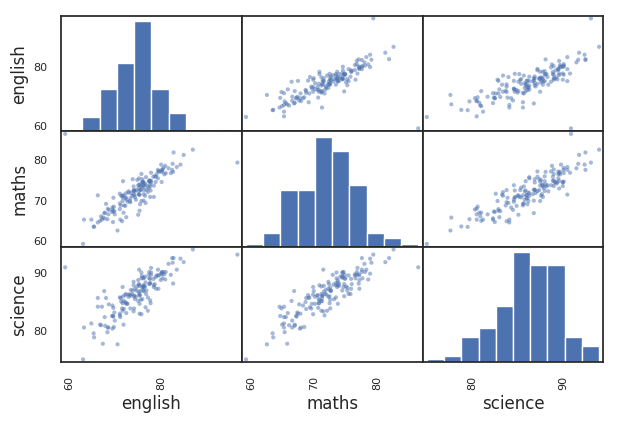

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_lea, diagonal='hist');

### Seaborn way for matrix scatterplot
This looks the nicest :)

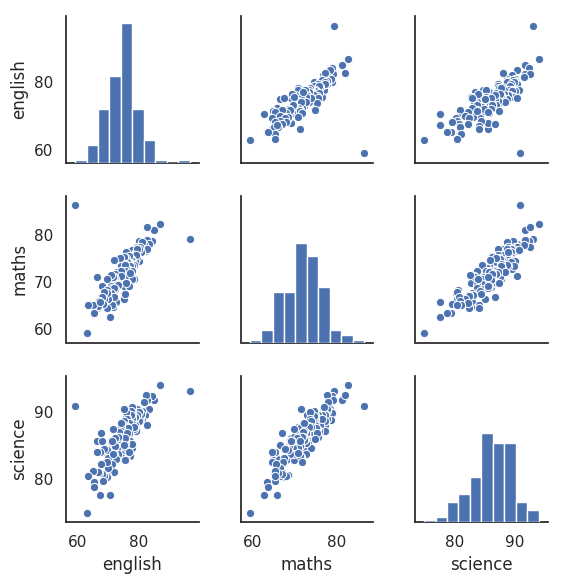

In [10]:
sns.pairplot(data=df_lea, diag_kind='hist', height=2.0);

### Plotly doing an interactive matrix scatterplot
This allows for quickly checking outliers.  
Disadvantage is: it's verbose and requires quite some typing and not always intuitive.  
More info here: https://plot.ly/python/splom/

In [11]:
text = [df_lea.loc[ k, 'lea'] for k in range(len(df_lea))]  # to get the city when you hover over the data point

fig = go.FigureWidget(
    data=[{
        'dimensions': [{'label': column_name, 'values': df_lea[column_name]} 
                       for column_name in ['english', 'maths', 'science']],
        'text': text,
        'type': 'splom',
    }],
    layout={
        'title': 'Relationship income and household',
        'width': 500,  # size of plot
        'height': 500,  # size of plot
        'hovermode': 'closest',
    }
)
fig

FigureWidget({
    'data': [{'dimensions': [{'label': 'english',
                              'values': array…

# Profile plots 

This means creating a plot over rows instead of over columns.  
Easiest way to do this is to transpose the dataframe.

In [12]:
echin= pd.read_csv('./data/echinacea.csv', header=0).set_index('sample')
echin.index = echin.index.str.strip()
echin

,lCu,lFe,lMn,lZn,lNi,lLi,lSr,lMg,lCa
sample,,,,,,,,,
root,2.442,5.136,2.573,1.504,-0.693,1.030,2.028,8.083,8.511
stem,2.241,4.615,2.939,1.856,1.308,-0.105,1.482,8.129,9.103
leaf,2.468,5.677,4.214,2.542,1.629,1.163,2.370,9.034,10.285
flower,2.766,5.215,3.398,2.923,2.230,0.833,1.482,8.158,9.589
herbs,2.322,5.394,3.738,2.534,1.459,1.030,1.917,8.748,10.065


### Transpose the data

In [13]:
echin_transpose = echin.transpose()
echin_transpose

sample,root,stem,leaf,flower,herbs
lCu,2.442,2.241,2.468,2.766,2.322
lFe,5.136,4.615,5.677,5.215,5.394
lMn,2.573,2.939,4.214,3.398,3.738
lZn,1.504,1.856,2.542,2.923,2.534
lNi,-0.693,1.308,1.629,2.230,1.459
lLi,1.030,-0.105,1.163,0.833,1.030
lSr,2.028,1.482,2.370,1.482,1.917
lMg,8.083,8.129,9.034,8.158,8.748
lCa,8.511,9.103,10.285,9.589,10.065


### Change the order of the sample

In [14]:
echin_transpose['sum'] = echin_transpose.sum(axis=1)
echin_transpose = echin_transpose.sort_values(by='sum').drop(columns='sum')
echin_transpose

sample,root,stem,leaf,flower,herbs
lLi,1.030,-0.105,1.163,0.833,1.030
lNi,-0.693,1.308,1.629,2.230,1.459
lSr,2.028,1.482,2.370,1.482,1.917
lZn,1.504,1.856,2.542,2.923,2.534
lCu,2.442,2.241,2.468,2.766,2.322
lMn,2.573,2.939,4.214,3.398,3.738
lFe,5.136,4.615,5.677,5.215,5.394
lMg,8.083,8.129,9.034,8.158,8.748
lCa,8.511,9.103,10.285,9.589,10.065


### Plot the transpose of the original table = profile plot

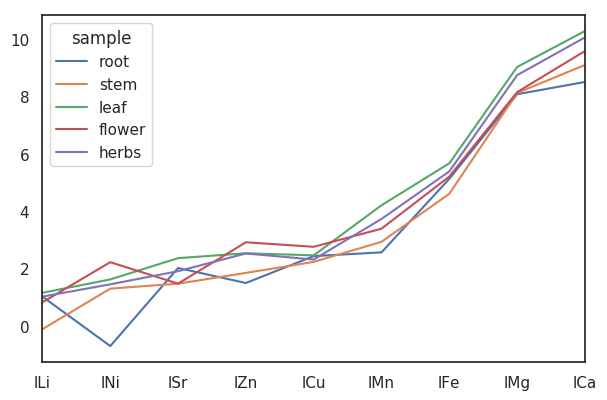

In [15]:
ax = echin_transpose.plot(kind='line')
plt.xticks(ticks=range(len(echin_transpose)), labels=echin_transpose.index);